In [ ]:
import pandas as pd # used for analysis and manipulation
from matplotlib import pyplot as plt # used for plot graph
import seaborn as sns # data visualization tool
import numpy as np # used for data-array
import warnings
import pickle # to save the file as a binary file for later use
import random as rd
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding
from keras.layers import SpatialDropout1D
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Bidirectional
from keras.layers import Dropout
from keras.losses import categorical_crossentropy
from six import StringIO
from IPython.display import Image
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from numpy.polynomial.polynomial import polyfit
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    mean_squared_error,
    r2_score,
    mean_absolute_error,
    confusion_matrix
)

warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))


In [3]:
dataset_train=pd.read_csv('D:/Major Project/Enhancing Student Assessment through AI-Integrated Predictive Models/Dataset/CSCI2720 Data Structures spring.csv')

In [4]:
dataset_train.head()

,Quiz-1 Points Grade <Numeric MaxPoints:25 Weight:20 Category:Quiz CategoryWeight:25>,Quiz-2 Points Grade <Numeric MaxPoints:30 Weight:20 Category:Quiz CategoryWeight:25>,Quiz-3 Points Grade <Numeric MaxPoints:25 Weight:20 Category:Quiz CategoryWeight:25>,Quiz-4 Points Grade <Numeric MaxPoints:30 Weight:20 Category:Quiz CategoryWeight:25>,Quiz-5 Points Grade <Numeric MaxPoints:25 Weight:20 Category:Quiz CategoryWeight:25>,Assignment 1 Points Grade <Numeric MaxPoints:100 Weight:20 Category:Assignments CategoryWeight:25>,Assignment 2 Points Grade <Numeric MaxPoints:100 Weight:20 Category:Assignments CategoryWeight:25>,Assignment 3 Points Grade <Numeric MaxPoints:100 Weight:20 Category:Assignments CategoryWeight:25>,Assignment 4 Points Grade <Numeric MaxPoints:100 Weight:20 Category:Assignments CategoryWeight:25>,Assignment-5 Points Grade <Numeric MaxPoints:100 Weight:20 Category:Assignments CategoryWeight:25>,Midterm Points Grade <Numeric MaxPoints:100 Weight:25>,Final Exam Points Grade <Numeric MaxPoints:100 Weight:25>,WeightedTotal
0,13.88,14.0,22.0,22.0,17.0,59.0,105.0,91.0,95.0,85.0,64.0,68.0,71.326000
1,18.05,22.0,16.0,19.0,25.0,100.0,110.0,100.0,100.0,95.0,86.0,66.0,81.893333
2,14.35,24.0,17.0,22.0,21.0,100.0,103.0,98.0,95.0,90.0,89.0,66.0,81.186667
3,21.29,18.0,23.0,28.0,20.0,98.0,105.0,109.0,106.0,100.0,71.0,90.0,86.674667
4,25.00,23.0,20.0,25.0,21.0,86.0,103.0,98.0,95.0,90.0,93.0,68.0,85.050000


In [5]:
dataset_train.tail()

,Quiz-1 Points Grade <Numeric MaxPoints:25 Weight:20 Category:Quiz CategoryWeight:25>,Quiz-2 Points Grade <Numeric MaxPoints:30 Weight:20 Category:Quiz CategoryWeight:25>,Quiz-3 Points Grade <Numeric MaxPoints:25 Weight:20 Category:Quiz CategoryWeight:25>,Quiz-4 Points Grade <Numeric MaxPoints:30 Weight:20 Category:Quiz CategoryWeight:25>,Quiz-5 Points Grade <Numeric MaxPoints:25 Weight:20 Category:Quiz CategoryWeight:25>,Assignment 1 Points Grade <Numeric MaxPoints:100 Weight:20 Category:Assignments CategoryWeight:25>,Assignment 2 Points Grade <Numeric MaxPoints:100 Weight:20 Category:Assignments CategoryWeight:25>,Assignment 3 Points Grade <Numeric MaxPoints:100 Weight:20 Category:Assignments CategoryWeight:25>,Assignment 4 Points Grade <Numeric MaxPoints:100 Weight:20 Category:Assignments CategoryWeight:25>,Assignment-5 Points Grade <Numeric MaxPoints:100 Weight:20 Category:Assignments CategoryWeight:25>,Midterm Points Grade <Numeric MaxPoints:100 Weight:25>,Final Exam Points Grade <Numeric MaxPoints:100 Weight:25>,WeightedTotal
529,19.0,28.0,13.0,23.25,22.5,36.3,100.0,95.00,100.0,88.6,82.0,82.0,81.557500
530,24.0,20.0,21.0,22.50,19.5,100.0,95.0,97.00,92.5,97.9,96.0,98.0,93.140833
531,12.0,28.0,21.0,22.75,19.5,9.0,9.0,17.61,66.8,80.0,70.0,NaN,45.808000
532,25.0,28.0,21.0,26.25,22.5,92.5,100.0,98.35,100.0,100.0,94.0,81.0,91.355000
533,13.0,25.0,19.0,22.00,21.0,36.3,72.0,100.00,108.0,98.9,64.0,94.0,78.885000


In [6]:
dataset_train.rename(columns={'Quiz-1 Points Grade <Numeric MaxPoints:25 Weight:20 Category:Quiz CategoryWeight:25>': 'Q1', 'Quiz-2 Points Grade <Numeric MaxPoints:30 Weight:20 Category:Quiz CategoryWeight:25>': 'Q2','Quiz-3 Points Grade <Numeric MaxPoints:25 Weight:20 Category:Quiz CategoryWeight:25>':'Q3','Quiz-4 Points Grade <Numeric MaxPoints:30 Weight:20 Category:Quiz CategoryWeight:25>':'Q4','Quiz-5 Points Grade <Numeric MaxPoints:25 Weight:20 Category:Quiz CategoryWeight:25>':'Q5','Assignment 1 Points Grade <Numeric MaxPoints:100 Weight:20 Category:Assignments CategoryWeight:25>':'A1','Assignment 2 Points Grade <Numeric MaxPoints:100 Weight:20 Category:Assignments CategoryWeight:25>':'A2','Assignment 3 Points Grade <Numeric MaxPoints:100 Weight:20 Category:Assignments CategoryWeight:25>':'A3','Assignment 4 Points Grade <Numeric MaxPoints:100 Weight:20 Category:Assignments CategoryWeight:25>':'A4','Assignment-5 Points Grade <Numeric MaxPoints:100 Weight:20 Category:Assignments CategoryWeight:25>':'A5','Midterm Points Grade <Numeric MaxPoints:100 Weight:25>':'MT','Final Exam Points Grade <Numeric MaxPoints:100 Weight:25>':'FE'}, inplace=True)
dataset_train.head()

,Q1,Q2,Q3,Q4,Q5,A1,A2,A3,A4,A5,MT,FE,WeightedTotal
0,13.88,14.0,22.0,22.0,17.0,59.0,105.0,91.0,95.0,85.0,64.0,68.0,71.326000
1,18.05,22.0,16.0,19.0,25.0,100.0,110.0,100.0,100.0,95.0,86.0,66.0,81.893333
2,14.35,24.0,17.0,22.0,21.0,100.0,103.0,98.0,95.0,90.0,89.0,66.0,81.186667
3,21.29,18.0,23.0,28.0,20.0,98.0,105.0,109.0,106.0,100.0,71.0,90.0,86.674667
4,25.00,23.0,20.0,25.0,21.0,86.0,103.0,98.0,95.0,90.0,93.0,68.0,85.050000


In [7]:
dataset_train.shape

(534, 13)

In [8]:
dataset_train.isna().sum() / dataset_train.shape[0]

Q1               0.016854
Q2               0.014981
Q3               0.013109
Q4               0.018727
Q5               0.013109
A1               0.011236
A2               0.013109
A3               0.013109
A4               0.018727
A5               0.011236
MT               0.007491
FE               0.016854
WeightedTotal    0.000000
dtype: float64

In [9]:
dataset_train.duplicated().any()

False

In [10]:
dataset_train.describe()

,Q1,Q2,Q3,Q4,Q5,A1,A2,A3,A4,A5,MT,FE,WeightedTotal
count,525.000000,526.000000,527.000000,524.000000,527.000000,528.000000,527.000000,527.000000,524.000000,528.000000,530.000000,525.000000,534.000000
mean,20.827238,25.110214,20.501139,24.903149,20.811195,95.831477,98.557495,94.812030,98.399637,94.564962,84.132075,83.053333,85.502265
std,4.240825,5.553926,4.014573,4.436162,4.622429,25.493316,23.628370,21.884358,18.082478,19.289417,13.483222,11.572911,13.128386
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,23.000000,18.000000,23.000000,18.750000,97.000000,95.000000,97.000000,98.000000,97.000000,77.000000,78.000000,81.581307
50%,22.000000,27.000000,21.000000,26.000000,21.000000,100.000000,100.000000,100.000000,100.000000,100.000000,86.000000,84.000000,87.691000
75%,24.000000,29.500000,23.000000,28.000000,24.000000,100.000000,110.500000,100.000000,100.250000,100.000000,94.000000,92.000000,93.615227
max,28.500000,30.000000,27.000000,30.000000,30.000000,135.000000,120.000000,120.000000,120.000000,120.000000,110.000000,100.000000,105.488710


In [11]:
dataset_train.fillna(0,inplace=True)
dataset_train.isnull().sum()

Q1               0
Q2               0
Q3               0
Q4               0
Q5               0
A1               0
A2               0
A3               0
A4               0
A5               0
MT               0
FE               0
WeightedTotal    0
dtype: int64

In [12]:
def count_plot(column_name, hue = None, rotation = 0):
    """
    1) input : column name, column data type must be object or categorical
    3) output : cout plot using seaborn modules, unique values in x-axis and frequency in y-axis
    4) i use bar_label to show frequency of each unique values above each column in graph
    """
    graph = sns.countplot(x = column_name, data = dataset_train, hue = hue, order = dataset_train[column_name].value_counts().index)
    for container in graph.containers:
        graph.bar_label(container)
        
        
    plt.xticks(rotation = rotation)
    plt.show()

In [13]:
def box_plot(x_axis = None, y_axis = None, hue = None, col = None):
    """
    input : x_axis, y_axis and hue column, column data type must be numeric in y_axis
    output : box plot to see distribution of column values such as min,max,mean,medien,std
    """
    sns.catplot(x = x_axis, y = y_axis, data = dataset_train, hue = hue, kind = "box", col = col)
    plt.xlabel(x_axis)
    plt.ylabel("FRQ")
    plt.show()

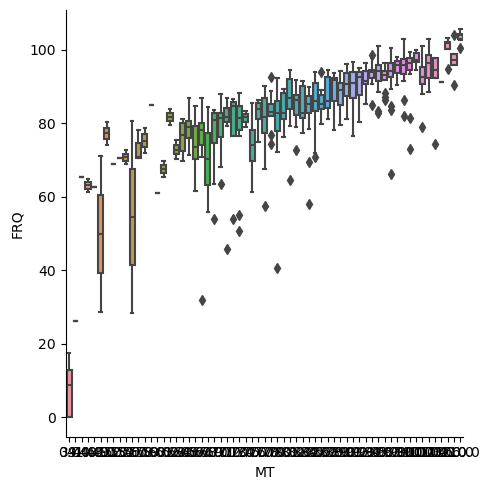

In [14]:
box_plot(x_axis = "MT", y_axis = "WeightedTotal")
#As we can see, the more hours you study, the greater the success rate

In [15]:
dataset_train['WeightedTotal']

0      71.326000
1      81.893333
2      81.186667
3      86.674667
4      85.050000
         ...    
529    81.557500
530    93.140833
531    45.808000
532    91.355000
533    78.885000
Name: WeightedTotal, Length: 534, dtype: float64

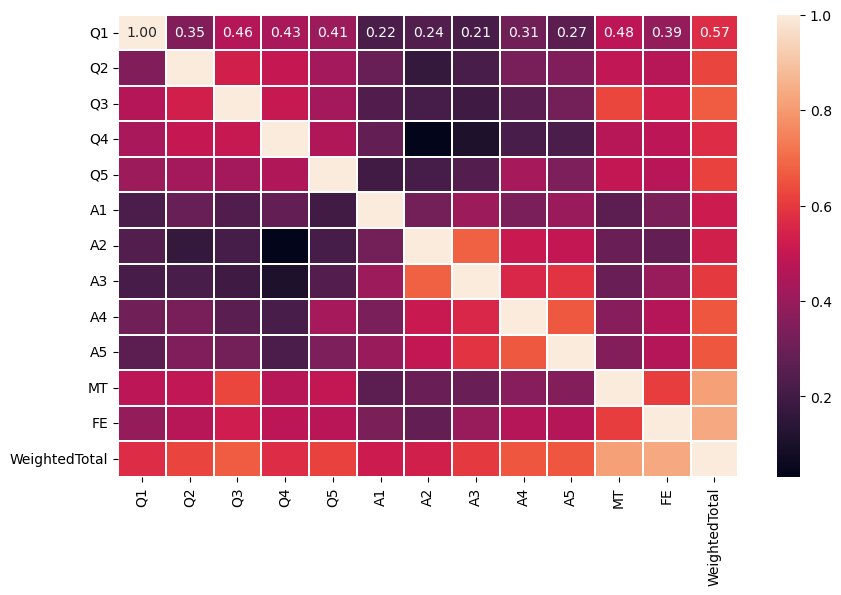

In [16]:
plt.figure(figsize = (10,6))
sns.heatmap(dataset_train.select_dtypes(exclude = object).corr(), annot = True, fmt = ".2f", linewidths = 0.2)
plt.show()

In [17]:
threshold = 60
dataset_train['Pass_Fail'] = (dataset_train['WeightedTotal'] >= threshold).astype(int)
y = dataset_train['Pass_Fail']

In [18]:
X = dataset_train.drop(['WeightedTotal'], axis=1)

X

,Q1,Q2,Q3,Q4,Q5,A1,A2,A3,A4,A5,MT,FE,Pass_Fail
0,13.88,14.0,22.0,22.00,17.0,59.0,105.0,91.00,95.0,85.0,64.0,68.0,1
1,18.05,22.0,16.0,19.00,25.0,100.0,110.0,100.00,100.0,95.0,86.0,66.0,1
2,14.35,24.0,17.0,22.00,21.0,100.0,103.0,98.00,95.0,90.0,89.0,66.0,1
3,21.29,18.0,23.0,28.00,20.0,98.0,105.0,109.00,106.0,100.0,71.0,90.0,1
4,25.00,23.0,20.0,25.00,21.0,86.0,103.0,98.00,95.0,90.0,93.0,68.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
529,19.00,28.0,13.0,23.25,22.5,36.3,100.0,95.00,100.0,88.6,82.0,82.0,1
530,24.00,20.0,21.0,22.50,19.5,100.0,95.0,97.00,92.5,97.9,96.0,98.0,1
531,12.00,28.0,21.0,22.75,19.5,9.0,9.0,17.61,66.8,80.0,70.0,0.0,0
532,25.00,28.0,21.0,26.25,22.5,92.5,100.0,98.35,100.0,100.0,94.0,81.0,1


In [19]:
categorical_features = [col for col in X.columns if X[col].dtype == 'object']
numerical_features = [col for col in X.columns if col not in categorical_features]

# Create the preprocessing pipelines for both numeric and categorical data.
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])

In [20]:
X.sample(5)

,Q1,Q2,Q3,Q4,Q5,A1,A2,A3,A4,A5,MT,FE,Pass_Fail
38,19.50,24.000000,15.0,27.00,21.0,91.0,109.0,100.0,100.0,0.0,75.0,66.0,1
30,21.29,27.000000,27.0,25.00,23.0,100.0,105.0,110.0,100.0,100.0,91.0,88.0,1
301,25.00,28.181818,25.0,23.00,23.0,97.3,92.5,100.0,90.0,100.0,92.0,82.0,1
58,12.96,26.000000,19.0,28.00,21.0,97.0,110.0,110.0,110.0,110.0,69.0,76.0,1
169,20.00,25.500000,23.0,27.75,20.0,100.0,118.0,100.0,120.0,98.0,106.0,84.0,1


In [21]:
y

0      1
1      1
2      1
3      1
4      1
      ..
529    1
530    1
531    0
532    1
533    1
Name: Pass_Fail, Length: 534, dtype: int32

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [23]:
print("x_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("x_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

x_train shape:  (373, 13)
y_train shape:  (373,)
x_test shape:  (161, 13)
y_test shape:  (161,)


In [24]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [25]:
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))


In [41]:
model = Sequential()
model.add(Bidirectional(LSTM(25, return_sequences=True), input_shape=(1, X_train.shape[2]))) #returns the full sequence of outputs at each time step.
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(25))) #it returns only output and Each unit represents a memory cell that can store information over time and perform computations
model.add(Dense(1, activation='sigmoid')) #sigmoid is commonly used for binary classification
model.add(Dropout(0.2)) #to prevent overfitting
model.add(Dense(1, activation='sigmoid'))

In [42]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


# Model summary to check the architecture
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_6 (Bidirecti  (None, 1, 50)             7800      
 onal)                                                           
                                                                 
 dropout_6 (Dropout)         (None, 1, 50)             0         
                                                                 
 bidirectional_7 (Bidirecti  (None, 50)                15200     
 onal)                                                           
                                                                 
 dense_4 (Dense)             (None, 1)                 51        
                                                                 
 dropout_7 (Dropout)         (None, 1)                 0         
                                                                 
 dense_5 (Dense)             (None, 1)                

In [43]:
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test), verbose=2)

# Evaluate the model



Epoch 1/100
6/6 - 22s - loss: 0.6405 - accuracy: 0.9303 - val_loss: 0.6374 - val_accuracy: 0.9689 - 22s/epoch - 4s/step
Epoch 2/100
6/6 - 0s - loss: 0.6384 - accuracy: 0.9651 - val_loss: 0.6322 - val_accuracy: 0.9689 - 137ms/epoch - 23ms/step
Epoch 3/100
6/6 - 0s - loss: 0.6322 - accuracy: 0.9651 - val_loss: 0.6269 - val_accuracy: 0.9689 - 126ms/epoch - 21ms/step
Epoch 4/100
6/6 - 0s - loss: 0.6285 - accuracy: 0.9651 - val_loss: 0.6213 - val_accuracy: 0.9689 - 126ms/epoch - 21ms/step
Epoch 5/100
6/6 - 0s - loss: 0.6220 - accuracy: 0.9651 - val_loss: 0.6152 - val_accuracy: 0.9689 - 142ms/epoch - 24ms/step
Epoch 6/100
6/6 - 0s - loss: 0.6148 - accuracy: 0.9651 - val_loss: 0.6087 - val_accuracy: 0.9689 - 120ms/epoch - 20ms/step
Epoch 7/100
6/6 - 0s - loss: 0.6077 - accuracy: 0.9651 - val_loss: 0.6015 - val_accuracy: 0.9689 - 141ms/epoch - 23ms/step
Epoch 8/100
6/6 - 0s - loss: 0.6018 - accuracy: 0.9651 - val_loss: 0.5937 - val_accuracy: 0.9689 - 121ms/epoch - 20ms/step
Epoch 9/100
6/6 - 0

In [44]:
predictions = (model.predict(X_test) > 0.5).astype("int32")  # Use 0.5 as a threshold for classification
print(classification_report(y_test, predictions))

6/6 [==============================] - 3s 6ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.97      1.00      0.98       156

    accuracy                           0.97       161
   macro avg       0.48      0.50      0.49       161
weighted avg       0.94      0.97      0.95       161



C:\Users\udayv\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\udayv\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\udayv\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [45]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy of the BLSTM: {:.2f}%".format(accuracy * 100))

Accuracy of the BLSTM: 96.89%


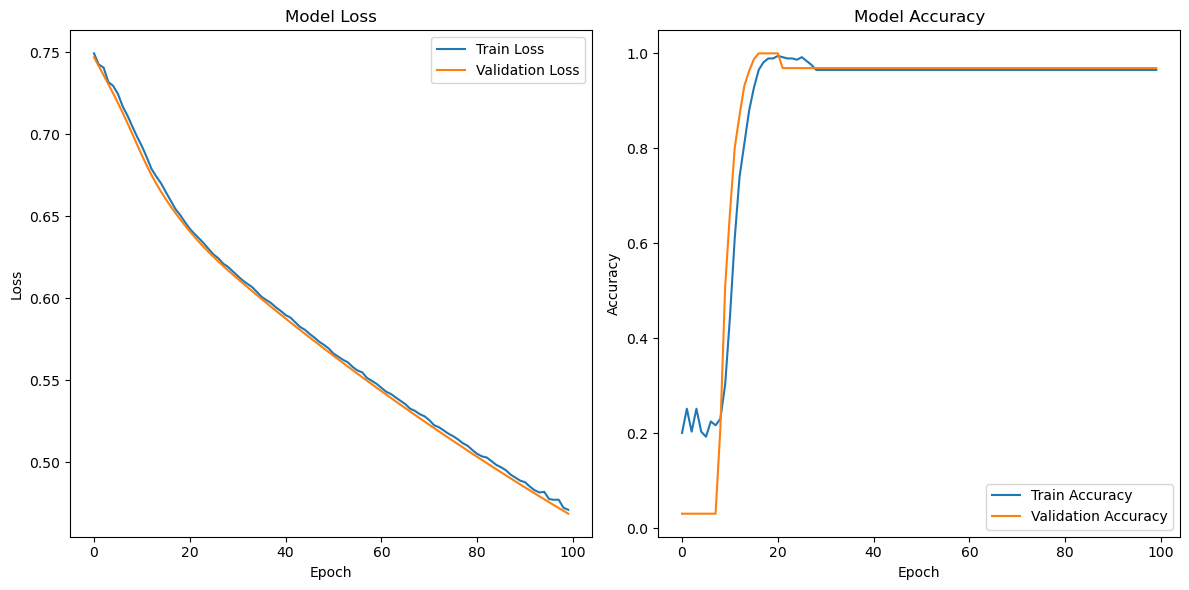

In [36]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()
